
# YouTube Engagement Analyzer: Enhancing Content Strategy Through Data

## Project Description:

In this data science and machine learning project, we will delve into the vast world of YouTube content to analyze user engagement, and recommend personalized video suggestions. Leveraging a comprehensive YouTube statistics dataset from Kaggle, our goal is to provide content creators and marketers with actionable insights to optimize their strategies and boost their channel's performance.

Key Objectives:

1. **Content Creator Profiling:**
   - Use the 'subscribers' and 'video views' columns to identify top content creators.
   - Group creators by category and country to understand the diversity of content on YouTube.


2. **Performance Metrics Analysis:**
   - Analyze 'subscribers,' 'video views,' and 'uploads' to identify trends and patterns in channel growth.
   - Create visualizations to represent changes over time.


3. **Monetization Insights:**
   - Utilize 'lowest_monthly_earnings' and 'highest_monthly_earnings' to analyze the earnings potential of content creators.
   - Identify factors that contribute to higher earnings.


4. **Audience Engagement and Demographics:**
   - Explore 'Country' and 'Urban_population' to understand the geographic distribution of viewers.
   - Analyze 'Gross tertiary education enrollment (%)' to assess the education level of the audience.


6. **Time-Series Trends:**
   - Apply time-series analysis to 'subscribers' and 'video_views' columns to identify trends, seasonality, and patterns.
   - Create forecasts to predict future channel performance.


7. **Predictive Modeling:**
   - Build predictive models using historical data to forecast metrics like 'subscribers' and 'video views.'
   - Evaluate the accuracy of the models and make recommendations based on predictions.


8. **Monetization Strategy Recommendations:**
   - Provide data-driven recommendations to content creators on how to improve earnings, engagement, and content quality.
   - Suggest strategies based on analysis of successful channels.

- **Engagement Analysis:** We will analyze metrics such as subscribers, rank, uploads, and views to identify patterns and trends. Through time series analysis, we aim to uncover when and why videos gain or lose popularity.

- **Recommendation Engine:** Building a recommendation system, we'll provide users with personalized video suggestions based on their viewing history and preferences, utilizing both collaborative filtering and content-based methods.

**Data Visualization:** Create informative data visualizations and interactive dashboards to present our findings in an engaging and comprehensible manner.

By the end of this project, we aim to empower YouTube content creators and marketers with data-driven strategies to enhance user engagement, improve content quality, and give insight on statistical analysis of the last 10 years.

# Import Libraries

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load Data 

In [361]:
data = pd.read_csv("Global YouTube Statistics.csv", encoding='ISO-8859-1')

# Data Preprocessing

In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [363]:
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [364]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [365]:
current_year = dt.datetime.now().year

# Calculate the year 10 years ago
ten_years_ago = current_year - 10

# Filter the data for the past 10 years
data = data[data['created_year'] >= ten_years_ago]

# Now, 'data_past_10_years' contains data from the past 10 years

# You can verify the filtered data
print(data[['created_year']].head(10))

    created_year
5         2013.0
6         2015.0
8         2016.0
9         2018.0
10        2014.0
12        2013.0
13        2016.0
16        2020.0
24        2013.0
27        2018.0


In [388]:
# Convert column names to lowercase
data.columns = data.columns.str.lower()

# Convert column names to snake_case
data.columns = data.columns.str.replace(' ', '_')

# Convert video views from scientific notation to regular notation
data['video_views'] = data['video_views'].apply(lambda x: '{:.0f}'.format(x))

# Rename the 'Gross tertiary education enrollment (%)' column
data = data.rename(columns={'gross_tertiary_education_enrollment_(%)': 'education_enrollment'})

# Convert 'video_views' to numeric
data['video_views'] = pd.to_numeric(data['video_views'], errors='coerce')

# Drop missing values
data.dropna(inplace=True)

print(data.head())
data.columns

    rank                               youtuber  subscribers  video_views  \
8      9                            Like Nastya    106000000  90479060027   
9     10                          Vlad and Niki     98900000  77180169894   
10    11                      Zee Music Company     96700000  57856289381   
13    14                              BLACKPINK     89800000  32144597566   
24    25  ChuChu TV Nursery Rhymes & Kids Songs     65900000  45757850229   

          category                                  title  uploads  \
8   People & Blogs                       Like Nastya Vlog      493   
9    Entertainment                          Vlad and Niki      574   
10           Music                      Zee Music Company     8548   
13  People & Blogs                              BLACKPINK      543   
24       Education  ChuChu TV Nursery Rhymes & Kids Songs      633   

          country abbreviation   channel_type  ...  \
8          Russia           RU         People  ...   
9   Unit

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date', 'education_enrollment',
       'population', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')

In [389]:
# Change the data type of 'created_year' to integer
data['created_year'] = data['created_year'].astype(int)

# Define a mapping dictionary for month names to numeric values
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Map the 'created_month' column
data['created_month'] = data['created_month'].map(month_mapping)
print(data.head())


    rank                               youtuber  subscribers  video_views  \
8      9                            Like Nastya    106000000  90479060027   
9     10                          Vlad and Niki     98900000  77180169894   
10    11                      Zee Music Company     96700000  57856289381   
13    14                              BLACKPINK     89800000  32144597566   
24    25  ChuChu TV Nursery Rhymes & Kids Songs     65900000  45757850229   

          category                                  title  uploads  \
8   People & Blogs                       Like Nastya Vlog      493   
9    Entertainment                          Vlad and Niki      574   
10           Music                      Zee Music Company     8548   
13  People & Blogs                              BLACKPINK      543   
24       Education  ChuChu TV Nursery Rhymes & Kids Songs      633   

          country abbreviation   channel_type  ...  \
8          Russia           RU         People  ...   
9   Unit

In [390]:
# Filter data to include only the last 10 years

# Get the current year
current_year = dt.datetime.now().year

# Calculate the year 10 years ago
ten_years_ago = current_year - 10

# Filter the entire DataFrame for the past 10 years
data = data[data['created_year'] >= ten_years_ago]

print(data.head())


    rank                               youtuber  subscribers  video_views  \
8      9                            Like Nastya    106000000  90479060027   
9     10                          Vlad and Niki     98900000  77180169894   
10    11                      Zee Music Company     96700000  57856289381   
13    14                              BLACKPINK     89800000  32144597566   
24    25  ChuChu TV Nursery Rhymes & Kids Songs     65900000  45757850229   

          category                                  title  uploads  \
8   People & Blogs                       Like Nastya Vlog      493   
9    Entertainment                          Vlad and Niki      574   
10           Music                      Zee Music Company     8548   
13  People & Blogs                              BLACKPINK      543   
24       Education  ChuChu TV Nursery Rhymes & Kids Songs      633   

          country abbreviation   channel_type  ...  \
8          Russia           RU         People  ...   
9   Unit

https://stackoverflow.com/questions/29849445/convert-scientific-notation-to-decimals

date created, earnings, country created, (regional differences)
consistency 
recommend similar channels based on a feature

tableau dashboard

## 1 Content Creator Profiling

In [391]:
# Profiling content creators by category
category_profile = data.groupby('category')['subscribers'].sum().reset_index()
category_profile = category_profile.sort_values(by='subscribers', ascending=False)

# Profiling content creators by country
country_profile = data.groupby('country')['subscribers'].sum().reset_index()
country_profile = country_profile.sort_values(by='subscribers', ascending=False)

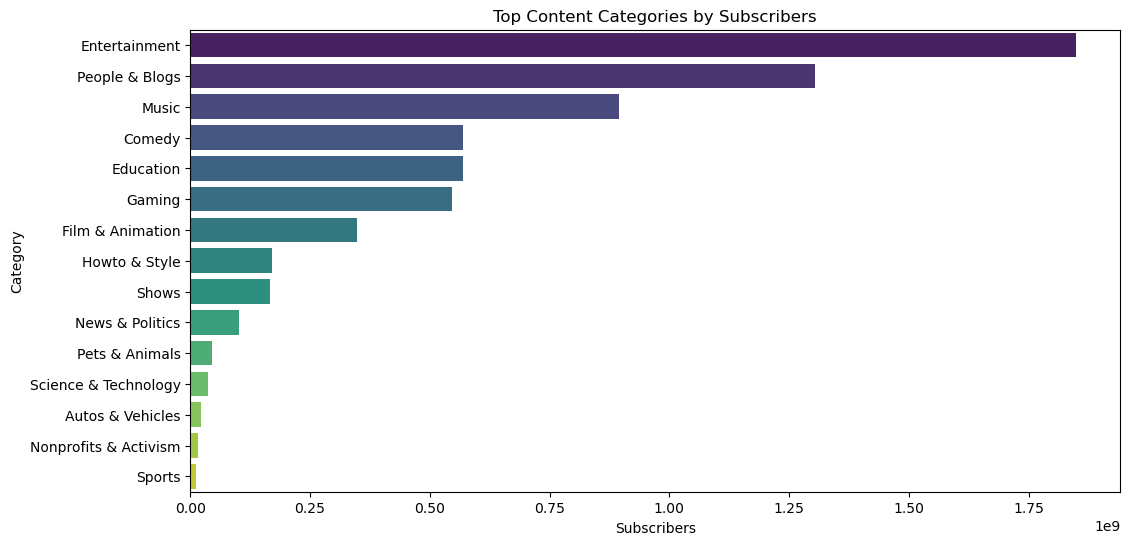

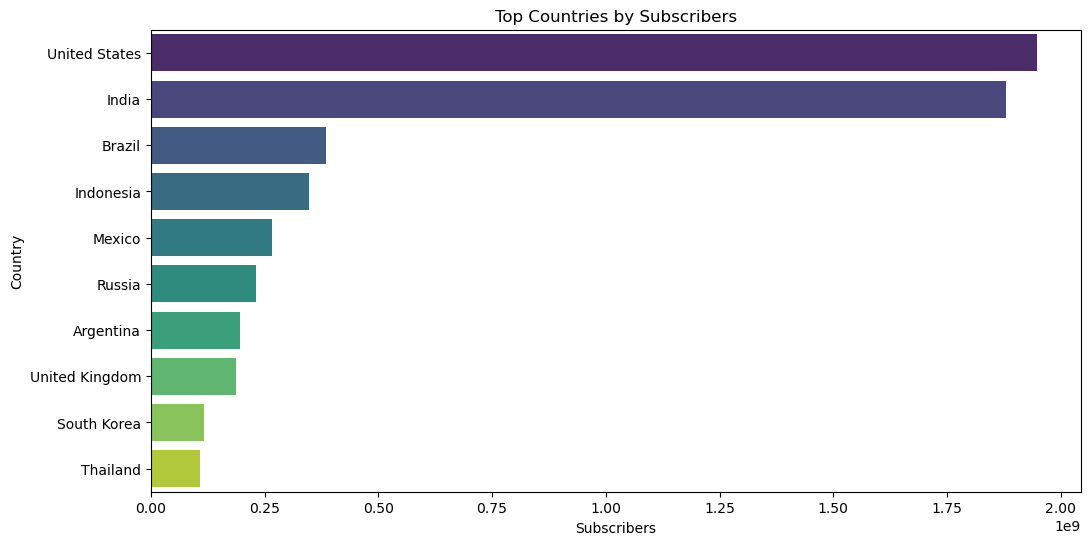

In [392]:
# Plot the top content categories by subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='category', data=category_profile, palette='viridis')
plt.title('Top Content Categories by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Category')
plt.show()

# Plot the top countries by subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='country', data=country_profile.head(10), palette='viridis')
plt.title('Top Countries by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Country')
plt.show()


The above graphs show that the top content categories are Entertainment, Music, and People & Blogs. The top countries are the United States, India, and Brazil. This gives us a good idea of the type of content that is popular on YouTube and where the content creators are located.

In [393]:
# Profiling content creators by category
category_profile = data.groupby('category')['subscribers'].sum().reset_index()
category_profile = category_profile.sort_values(by='subscribers', ascending=False)

# Profiling content creators by country
country_profile = data.groupby('country')['subscribers'].sum().reset_index()
country_profile = country_profile.sort_values(by='subscribers', ascending=False)

print("Top Content Categories by Subscribers:")
print(category_profile.head())

print("\nTop Countries by Subscribers:")
print(country_profile.head())


Top Content Categories by Subscribers:
          category  subscribers
3    Entertainment   1849100000
10  People & Blogs   1303700000
7            Music    895400000
1           Comedy    569900000
2        Education    569800000

Top Countries by Subscribers:
          country  subscribers
30  United States   1946800000
11          India   1879100000
2          Brazil    383800000
12      Indonesia    348300000
17         Mexico    266500000


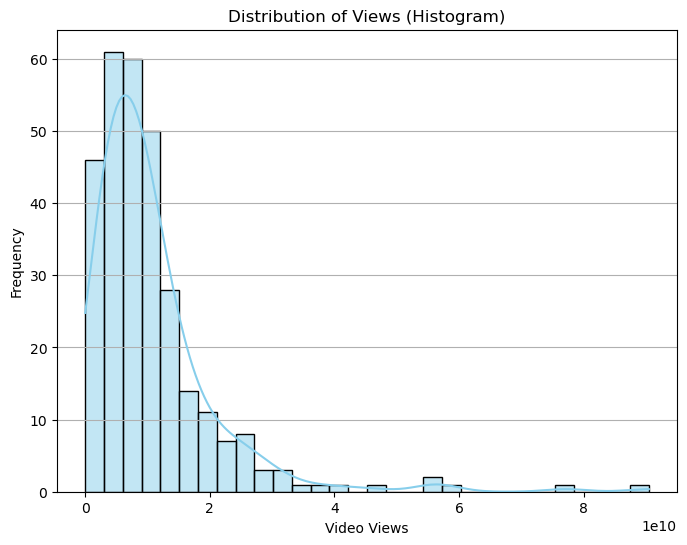

In [394]:
# Create a histogram for the distribution of 'video_views'
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='video_views', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Views (Histogram)')
plt.xlabel('Video Views')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


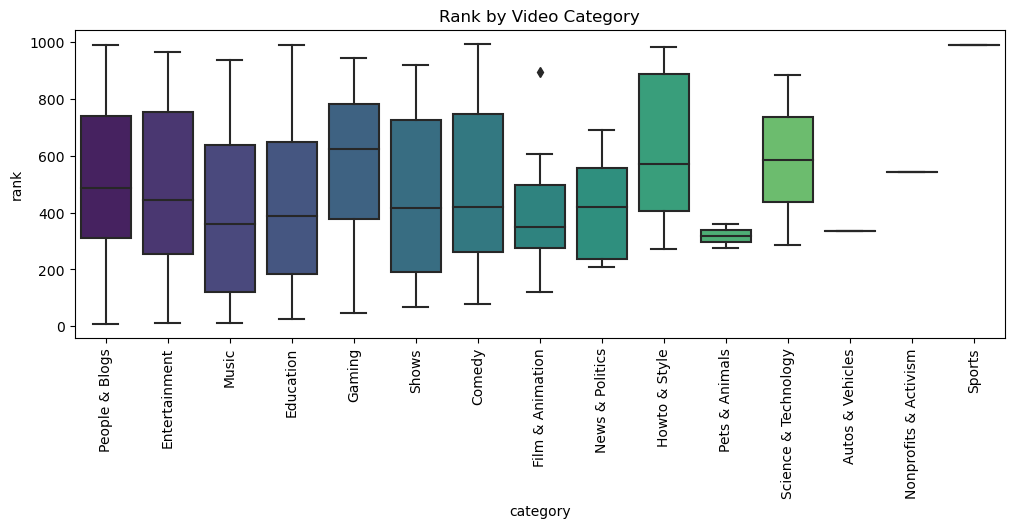

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='category', y='rank', palette='viridis')
plt.title('Rank by Video Category')
plt.xticks(rotation=90)
plt.show()


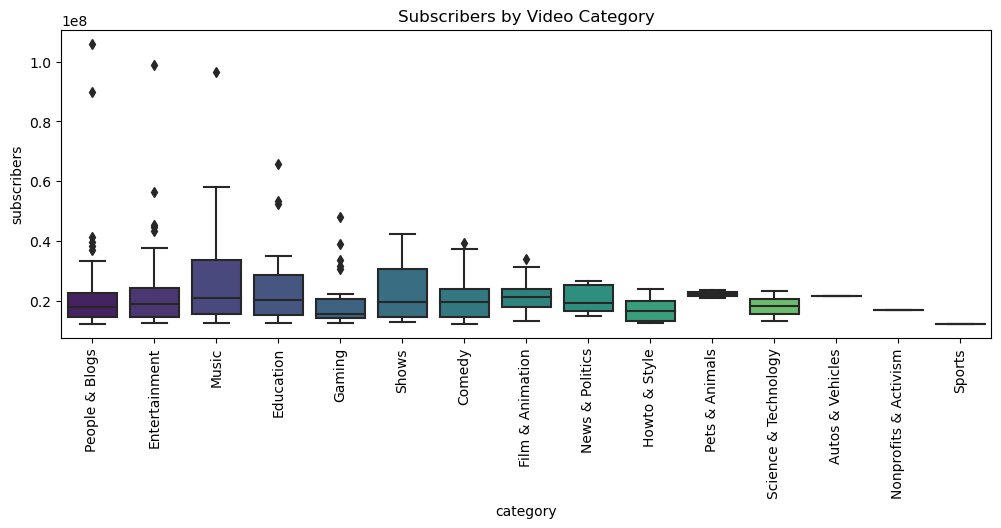

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='category', y='subscribers', palette='viridis')
plt.title('Subscribers by Video Category')
plt.xticks(rotation=90)
plt.show()


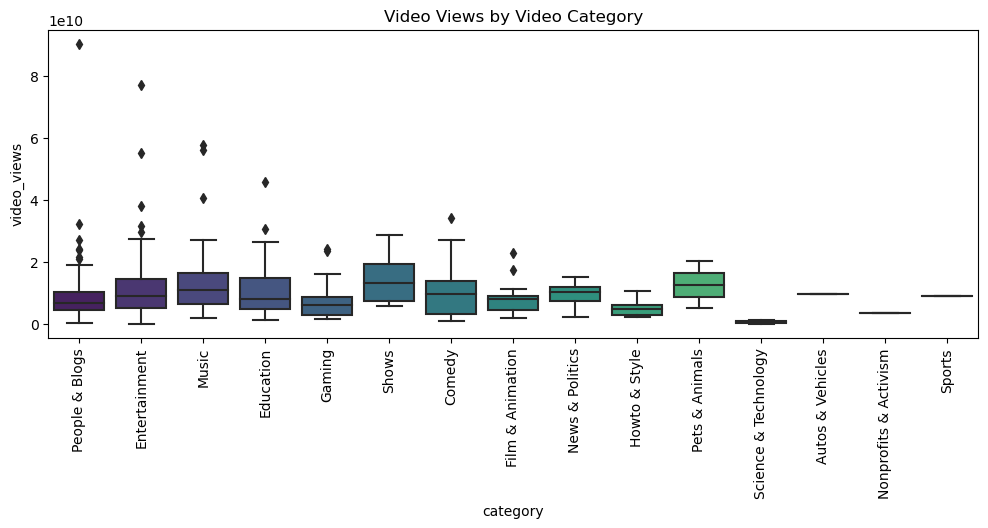

In [397]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='category', y='video_views', palette='viridis')
plt.title('Video Views by Video Category')
plt.xticks(rotation=90)
plt.show()


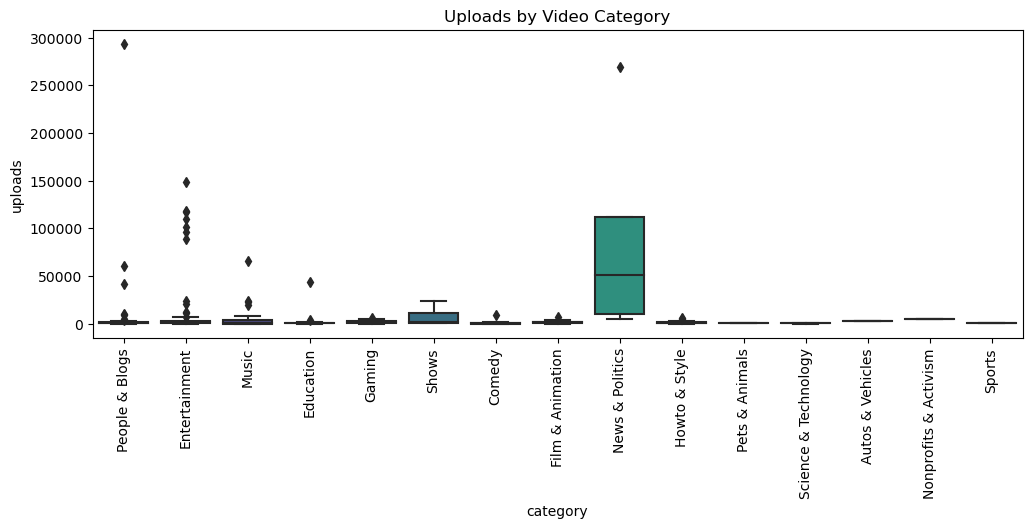

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='category', y='uploads', palette='viridis')
plt.title('Uploads by Video Category')
plt.xticks(rotation=90)
plt.show()


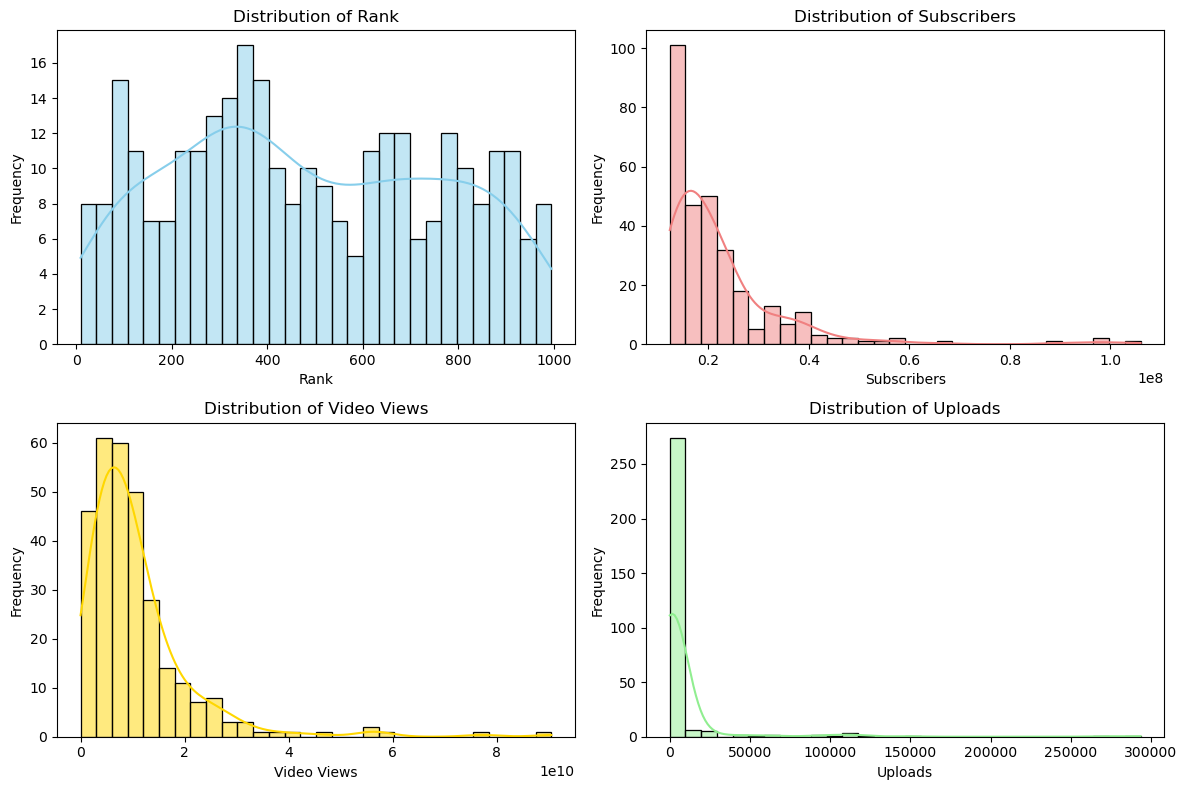

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and create subplots
plt.figure(figsize=(12, 8))

# Create the first histogram
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first plot
sns.histplot(data=data, x='rank', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')

# Create the second histogram
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second plot
sns.histplot(data=data, x='subscribers', kde=True, color='lightcoral', bins=30)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')

# Create the third histogram
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third plot
sns.histplot(data=data, x='video_views', kde=True, color='gold', bins=30)
plt.title('Distribution of Video Views')
plt.xlabel('Video Views')
plt.ylabel('Frequency')

# Create the fourth histogram
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth plot
sns.histplot(data=data, x='uploads', kde=True, color='lightgreen', bins=30)
plt.title('Distribution of Uploads')
plt.xlabel('Uploads')
plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the histograms
plt.show()


## 2. Performance Metrics Analysis

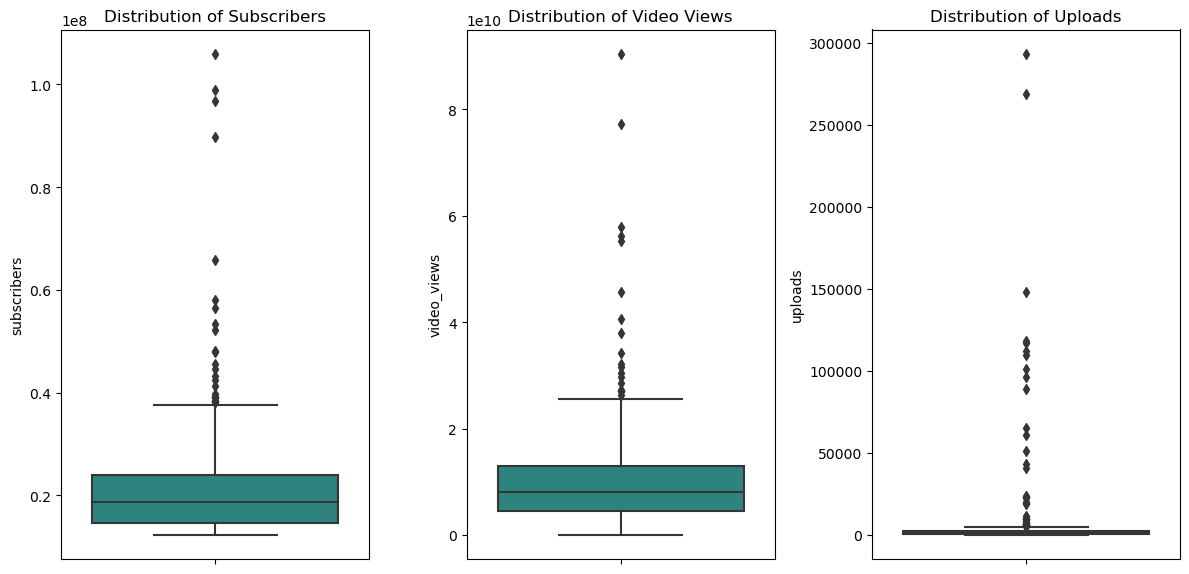

In [400]:
# Convert the 'video_views' column to numeric (if not already)
data['video_views'] = pd.to_numeric(data['video_views'], errors='coerce')

# Visualize the distribution of subscribers, video views, and uploads
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y='subscribers', data=data, palette='viridis')
plt.title('Distribution of Subscribers')

plt.subplot(1, 3, 2)
sns.boxplot(y='video_views', data=data, palette='viridis')
plt.title('Distribution of Video Views')

plt.subplot(1, 3, 3)
sns.boxplot(y='uploads', data=data, palette='viridis')
plt.title('Distribution of Uploads')

plt.tight_layout()
plt.show()


## 3. Monezitation Insights

/var/folders/19/y3wb23y56d14xq1lqh3w7b300000gn/T/ipykernel_28630/3466125868.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  earnings_vs_subscribers = sns.scatterplot(x='subscribers', y='lowest_monthly_earnings', data=data, palette='viridis')


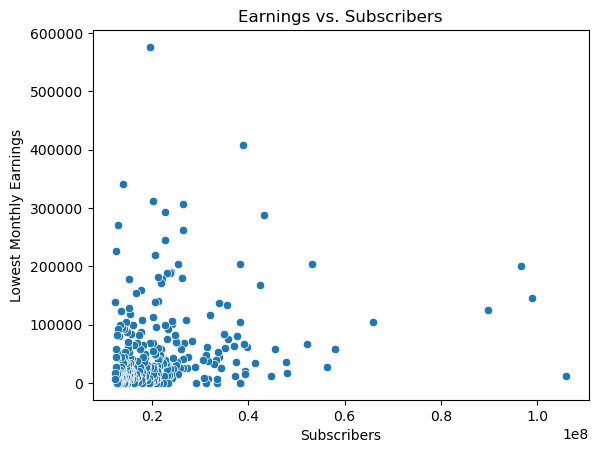

/var/folders/19/y3wb23y56d14xq1lqh3w7b300000gn/T/ipykernel_28630/3466125868.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  earnings_vs_video_views = sns.scatterplot(x='video_views', y='lowest_monthly_earnings', data=data, palette='viridis')


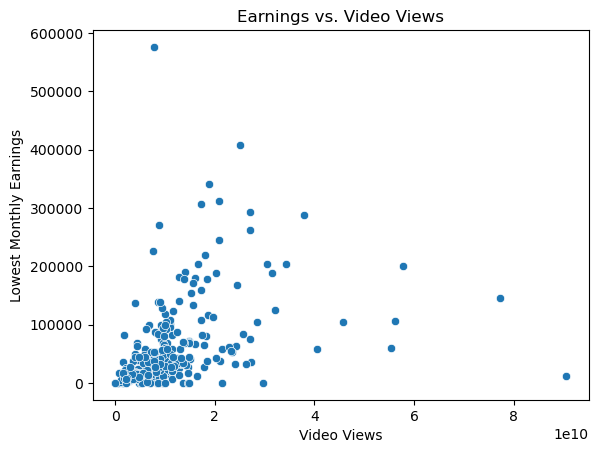

In [401]:
# Analyze earnings and their relationship with subscribers, video views, and channel type
earnings_vs_subscribers = sns.scatterplot(x='subscribers', y='lowest_monthly_earnings', data=data, palette='viridis')
plt.title('Earnings vs. Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Lowest Monthly Earnings')
plt.show()

earnings_vs_video_views = sns.scatterplot(x='video_views', y='lowest_monthly_earnings', data=data, palette='viridis')
plt.title('Earnings vs. Video Views')
plt.xlabel('Video Views')
plt.ylabel('Lowest Monthly Earnings')
plt.show()


## 3.1 Earnings by channel type

In [402]:
# Group the data by channel type and calculate the mean of the lowest and highest monthly earnings
earnings_by_channel_type = data.groupby('channel_type')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean().reset_index()
earnings_by_channel_type = earnings_by_channel_type.melt(id_vars='channel_type', value_vars=['lowest_monthly_earnings', 'highest_monthly_earnings'], var_name='earnings_type', value_name='earnings')

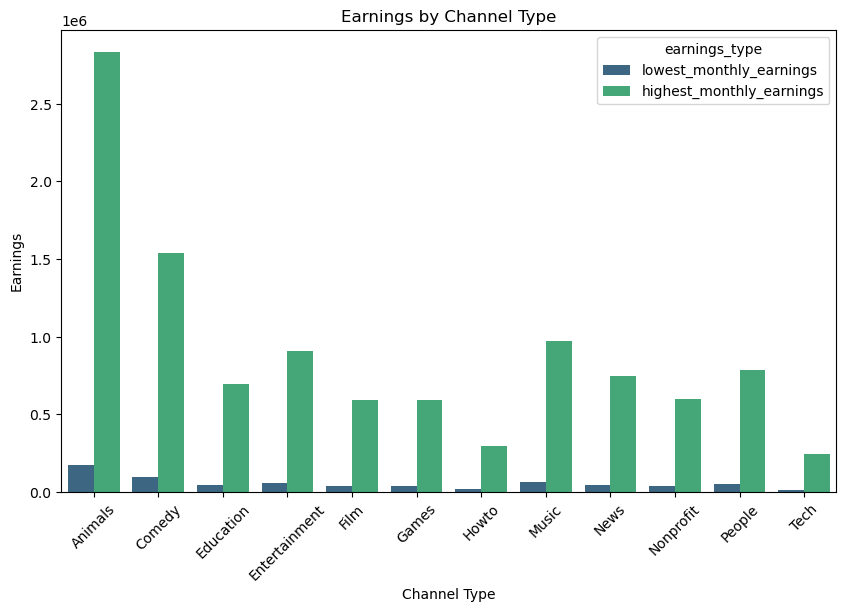

In [403]:
# Visualize earnings by channel type
plt.figure(figsize=(10, 6))
sns.barplot(x='channel_type', y='earnings', hue='earnings_type', data=earnings_by_channel_type, palette='viridis')
plt.title('Earnings by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Earnings')
plt.xticks(rotation=45)
plt.show()

## 4 Audience Engagement and Demographics

In [404]:
# Explore audience engagement (subscribers) by country
subscribers_by_country = data.groupby('country')['subscribers'].mean().reset_index()
subscribers_by_country = subscribers_by_country.sort_values(by='subscribers', ascending=False)

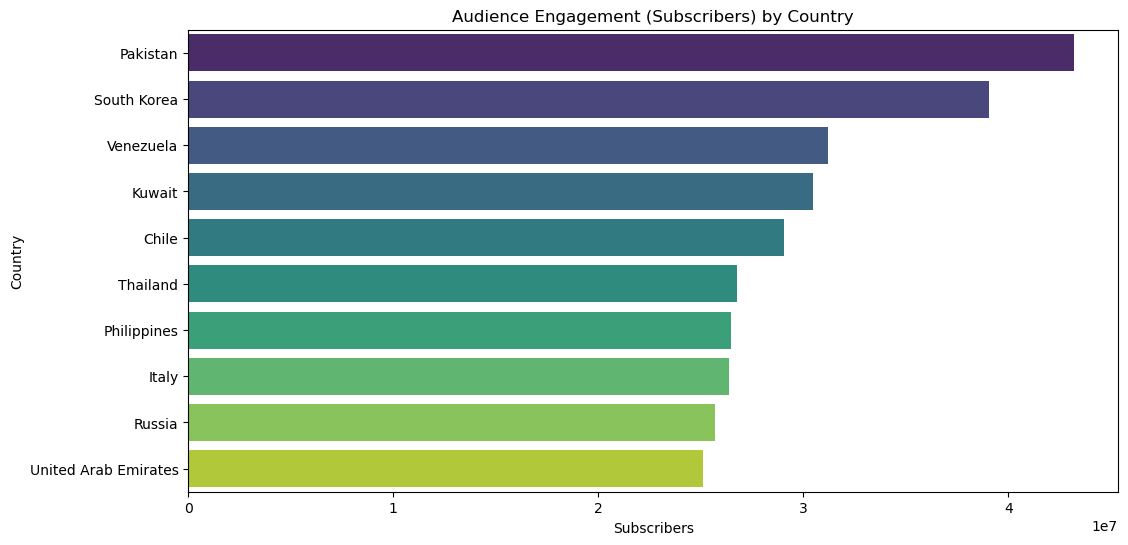

/var/folders/19/y3wb23y56d14xq1lqh3w7b300000gn/T/ipykernel_28630/1843743309.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  education_vs_subscribers = sns.scatterplot(x='education_enrollment', y='subscribers', data=data, palette='viridis')


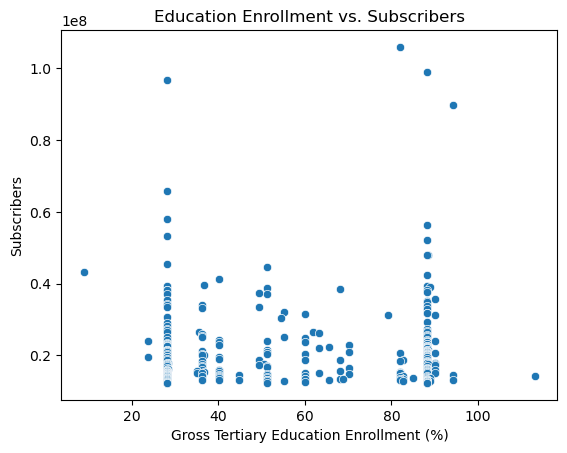

In [405]:
# Visualize audience engagement by country
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='country', data=subscribers_by_country.head(10), palette='viridis')
plt.title('Audience Engagement (Subscribers) by Country')
plt.xlabel('Subscribers')
plt.ylabel('Country')
plt.show()

# Explore education enrollment and its relationship with subscribers
education_vs_subscribers = sns.scatterplot(x='education_enrollment', y='subscribers', data=data, palette='viridis')
plt.title('Education Enrollment vs. Subscribers')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Subscribers')
plt.show()


The scatterplot visualizes the relationship between the percentage of gross tertiary education enrollment and the number of subscribers for YouTube content creators. This analysis aims to understand if there is any observable connection between the level of education enrollment in a country and the popularity of YouTube channels within that country.

    No Strong Linear Relationship: Upon initial examination, it is evident that there is no strong linear relationship between education enrollment and the number of subscribers. The data points are scattered across the plot, and there is no clear upward or downward trend. This suggests that education enrollment alone is not a strong predictor of a channel's subscriber count.

    Clusters and Variability: The data points appear to cluster in various regions of the plot. While some channels from countries with high education enrollment have a substantial number of subscribers, there are also instances where channels from countries with lower education enrollment have a comparable following. This indicates that other factors are likely influencing a channel's popularity.

    Outliers: There are noticeable outliers in the plot, representing channels with exceptionally high subscriber counts regardless of the education enrollment rate in their respective countries. These outliers may be driven by unique content, effective marketing strategies, or other external factors.

## 5 Time Series 

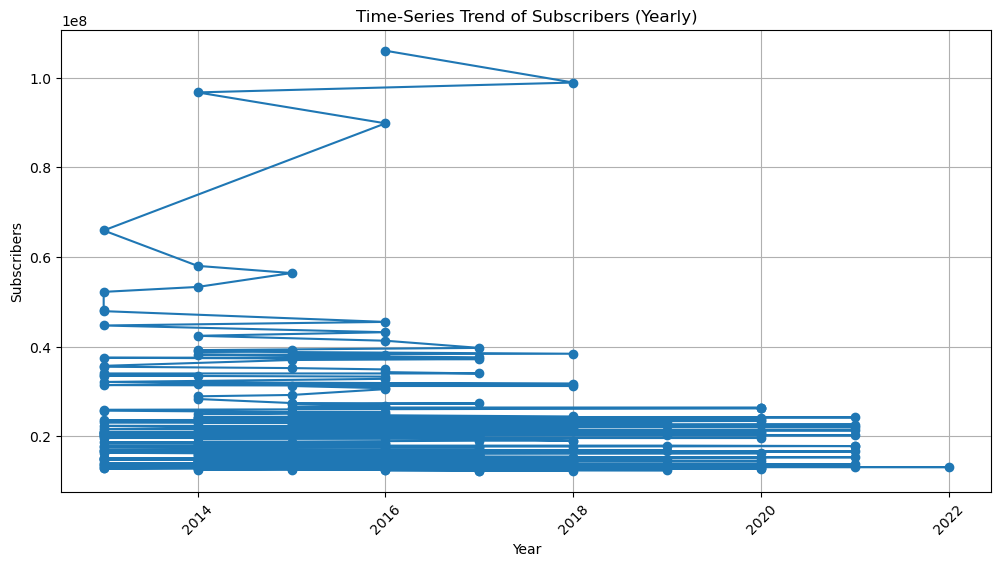

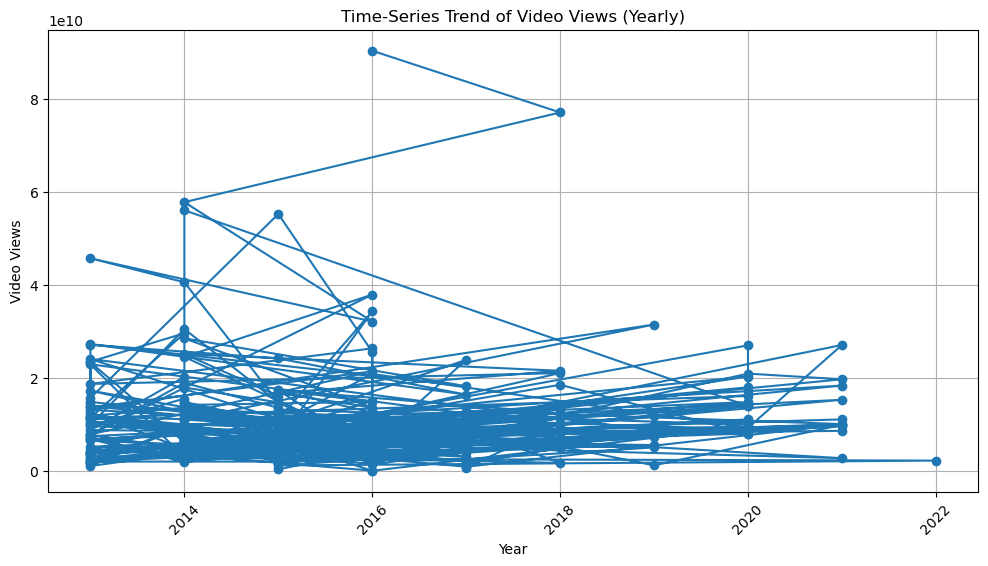

In [416]:


# Create a time series plot for subscribers by year
plt.figure(figsize=(12, 6))
plt.plot(data['created_year'], data['subscribers'], marker='o', linestyle='-')
plt.title('Time-Series Trend of Subscribers (Yearly)')
plt.xlabel('Year')
plt.ylabel('Subscribers')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Create a time series plot for video views by year
plt.figure(figsize=(12, 6))
plt.plot(data['created_year'], data['video_views'], marker='o', linestyle='-')
plt.title('Time-Series Trend of Video Views (Yearly)')
plt.xlabel('Year')
plt.ylabel('Video Views')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


## 5. Predictive Modeling

In [ ]:
# Prepare data for predictive modeling
X = data[['uploads', 'video_views_rank', 'country_rank', 'channel_type_rank']]
y = data['subscribers']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 97551774895852.78


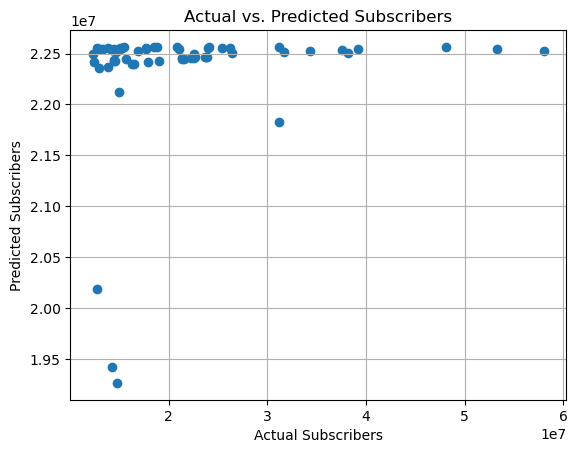

In [ ]:
# Visualize actual vs. predicted subscribers
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")
plt.title("Actual vs. Predicted Subscribers")
plt.grid(True)
plt.show()
